<b>Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

<b>R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Multi Linear Regression\50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.shape

(50, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<b>EDA

D:\Anaconda\Installation\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


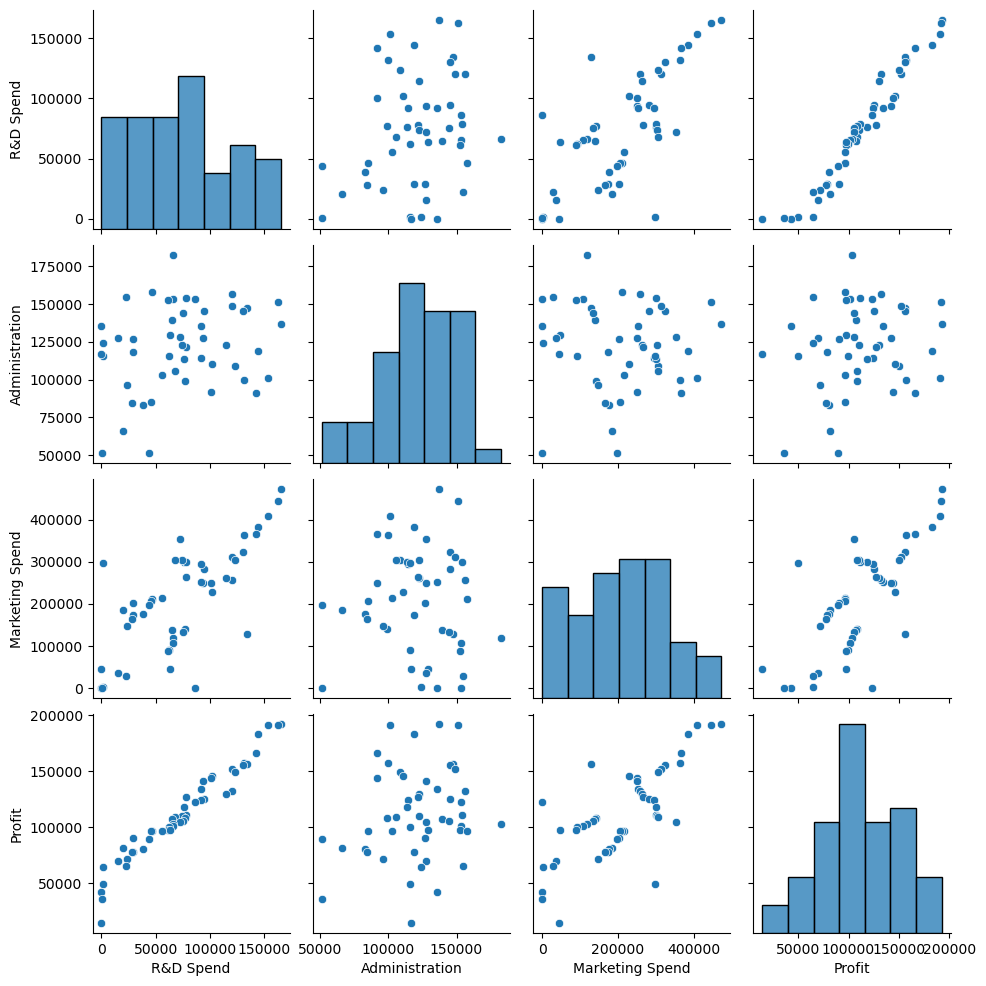

In [9]:
sns.pairplot(data)

<b> Above pairplot shows R&D Spend and Profit has linear relation when compared to other variables.

C:\Users\CSC\AppData\Local\Temp\ipykernel_18352\3729514227.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


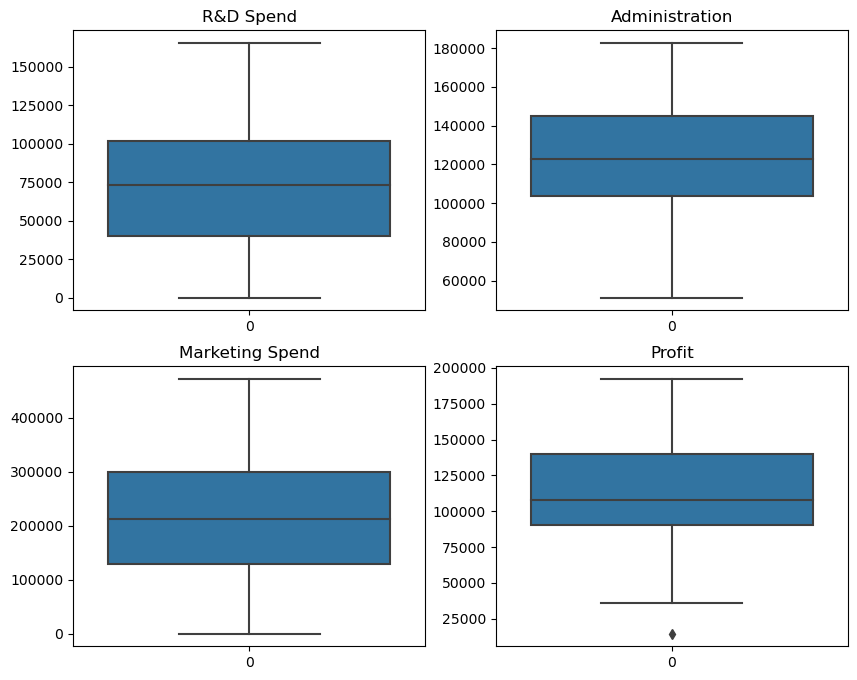

In [10]:
plt.subplots(figsize=(10,8))
plt.subplot(221)
sns.boxplot(data['R&D Spend'])
plt.title('R&D Spend')
plt.subplot(222)
sns.boxplot(data['Administration'])
plt.title('Administration')
plt.subplot(223)
sns.boxplot(data['Marketing Spend'])
plt.title('Marketing Spend')
plt.subplot(224)
sns.boxplot(data['Profit'])
plt.title('Profit')
plt.show()

<b> Some outliers are present in Profit

D:\Anaconda\Installation\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


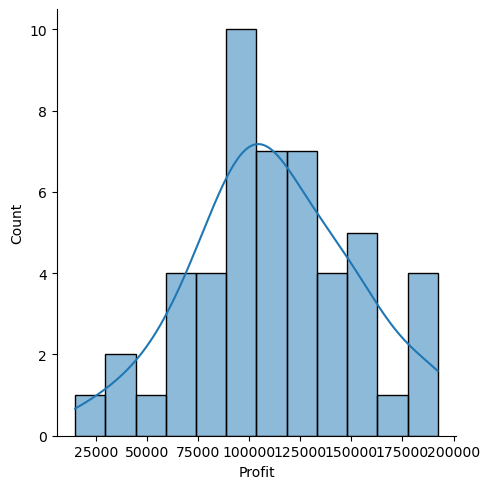

In [11]:
sns.displot(data['Profit'],bins=12,kde=True)

In [12]:
sns.heatmap(data.corr())

ValueError: could not convert string to float: 'New York'

<b> Again correllation between R&D Spend and Profit is higher compared to other two variables

<b>Since Profit has some Outliers let us remove them for better results

In [13]:
#Quantile method to remove bottom 1% observations
q = data['Profit'].quantile(0.01)
data_2 = data[data['Profit']>q]
data_2.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,49.000000,49.000000,49.000000,49.000000
mean,75226.138367,121433.636327,214409.833265,113998.991020
std,45115.141560,28301.008988,121168.170072,38171.246893
min,0.000000,51283.140000,0.000000,35673.410000
25%,44069.950000,103057.490000,134050.070000,90708.190000
50%,73994.560000,122782.750000,214634.810000,108552.040000
75%,101913.080000,145077.580000,299737.290000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


D:\Anaconda\Installation\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


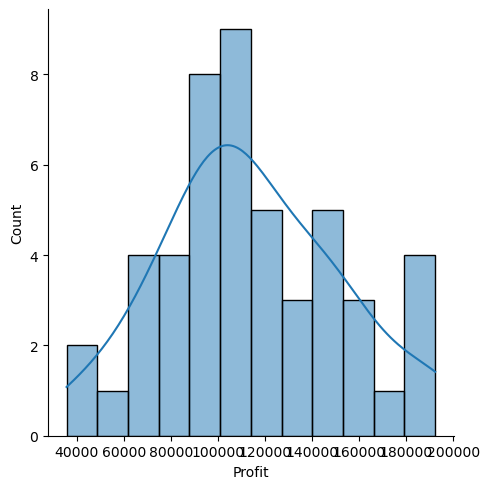

In [14]:
sns.displot(data_2['Profit'],bins=12,kde=True)

In [15]:
data_2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
data_2.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [17]:
data_2.shape

(49, 5)

<b>DATA TRANSFORMATION 

In [18]:
#converting categorical variables into numerical variables using one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
r = data_2['State'].values.reshape(-1,1)
enc_data = pd.DataFrame(enc.fit_transform(r).toarray())
data_3 = data_2.join(enc_data)

In [19]:
data_3.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,0,1,2
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0


In [20]:
data_3.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit,0,1,2
44,22177.74,154806.14,28334.72,California,65200.33,1.0,0.0,0.0
45,1000.23,124153.04,1903.93,New York,64926.08,0.0,0.0,1.0
46,1315.46,115816.21,297114.46,Florida,49490.75,0.0,1.0,0.0
47,0.00,135426.92,0.00,California,42559.73,1.0,0.0,0.0
48,542.05,51743.15,0.00,New York,35673.41,0.0,0.0,1.0


Therefore from above encoding, California - 0 , Florida - 1 , New York - 2

In [21]:
data_4 = data_3.drop(['State'],axis=1)
data_4.head()

,R&D Spend,Administration,Marketing Spend,Profit,0,1,2
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [22]:
data_4.tail()

,R&D Spend,Administration,Marketing Spend,Profit,0,1,2
44,22177.74,154806.14,28334.72,65200.33,1.0,0.0,0.0
45,1000.23,124153.04,1903.93,64926.08,0.0,0.0,1.0
46,1315.46,115816.21,297114.46,49490.75,0.0,1.0,0.0
47,0.00,135426.92,0.00,42559.73,1.0,0.0,0.0
48,542.05,51743.15,0.00,35673.41,0.0,0.0,1.0


<b>X and Y

In [23]:
x = data_4.drop(['Profit'],axis=1)
y = data_4['Profit']

In [24]:
x.columns = x.columns.astype(str)

<b>TRAIN TEST SPLIT

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=101)

<b>MODEL BUILDING

In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
model.intercept_

47777.5783871796

In [29]:
model.coef_

array([ 7.93874794e-01, -6.76125167e-03,  3.11782707e-02,  1.44617992e+03,
        2.49650702e+02, -1.69583062e+03])

In [30]:
Co_efficient = pd.DataFrame(model.coef_,x.columns,columns=['Co_efficient'])
Co_efficient

,Co_efficient
R&D Spend,0.793875
Administration,-0.006761
Marketing Spend,0.031178
0,1446.179921
1,249.650702
2,-1695.830623


In [31]:
y_pred = model.predict(x_test)
y_pred

array([ 76194.39306428, 115396.4500545 , 118301.73189413,  67471.86423089,
       129287.68548123, 191122.46038208,  46095.73644509, 116618.76158191,
       118576.10128386,  57551.9921317 ])

<Axes: xlabel='Profit'>

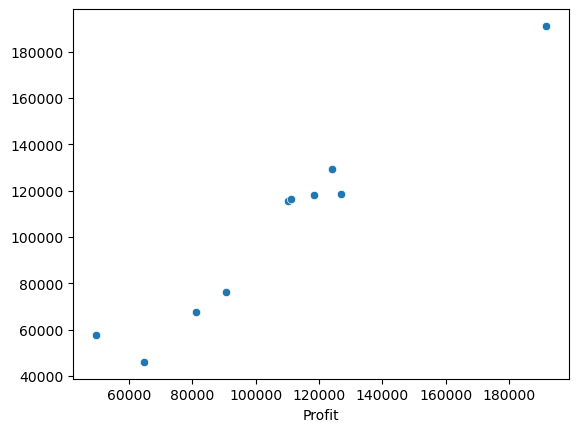

In [32]:
sns.scatterplot(x=y_test,y=y_pred,)

<Axes: xlabel='Profit', ylabel='Profit'>

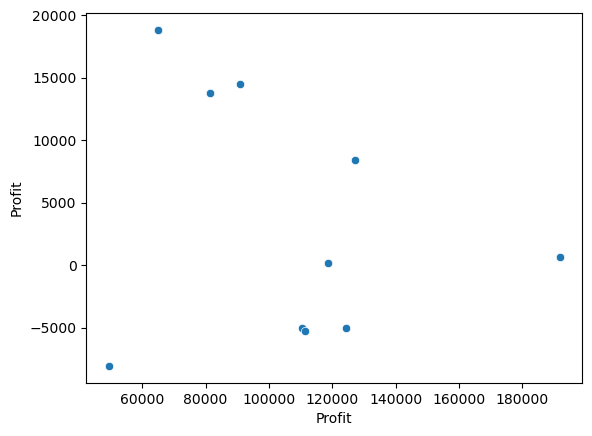

In [34]:
sns.scatterplot(x=y_test,y=(y_test-y_pred))

<Axes: ylabel='Profit'>

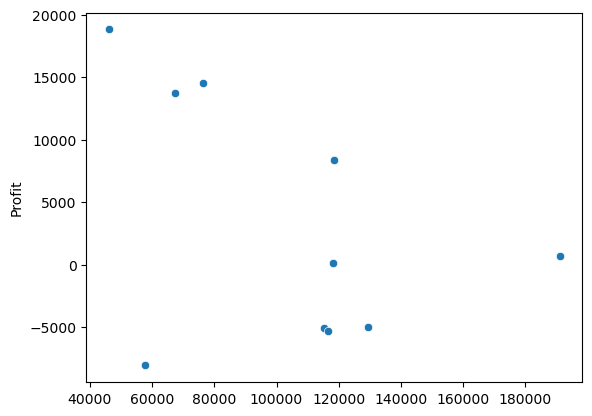

In [35]:
sns.scatterplot(x=y_pred,y=(y_test-y_pred))

C:\Users\CSC\AppData\Local\Temp\ipykernel_18352\520176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='Profit', ylabel='Density'>

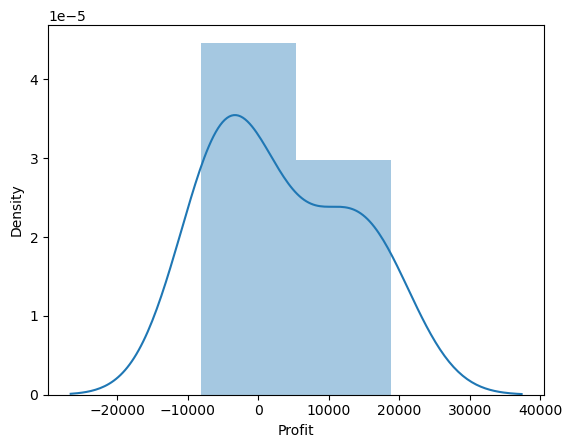

In [36]:
sns.distplot(y_test-y_pred)

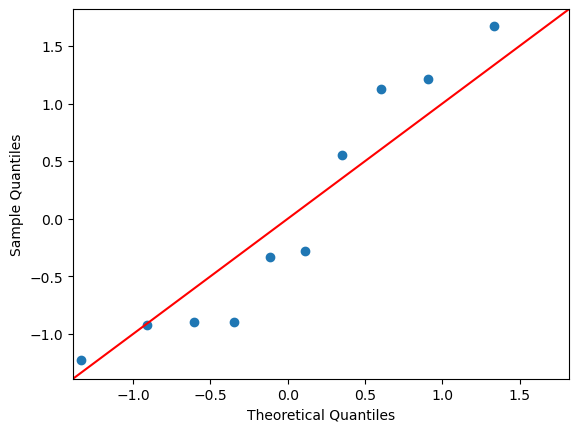

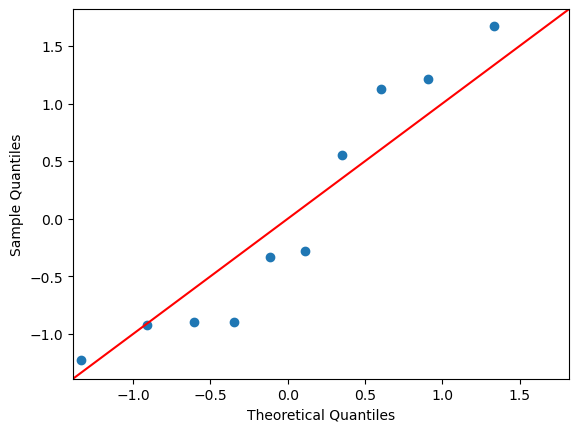

In [38]:
import statsmodels.api as sm
sm.qqplot(y_test-y_pred,line='45', fit=True)

<b>Both the above Graph shows that y_pred and y_test has a linear relationship and are uniformly distributed

In [39]:
from sklearn import metrics

In [40]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R_squared: ',metrics.r2_score(y_test,y_pred))

MAE:  7979.2031949011825
MSE:  96960039.07176156
RMSE:  9846.82888405001
R_squared:  0.9310193526159349


In [41]:
model.score(x_train,y_train)

0.9671793070915845

In [42]:
print(model.predict([[160000, 130000, 300000,1,0,0]]))

[184718.24378135]


D:\Anaconda\Installation\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<b>Therefore for a startup in California with R&D Spend of 160000, Administration spend of 130000 and a Marketing spend of 300000 is earning a Profit of 184718 USD.

In [43]:
print(model.predict([[160000, 130000, 300000,0,1,0]]))

[183521.71456184]


D:\Anaconda\Installation\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<b>Therefore for a startup in Florida with R&D Spend of 160000, Administration spend of 130000 and a Marketing spend of 300000 is earning a Profit of 183521 USD.

In [44]:
print(model.predict([[160000, 130000, 300000,0,0,1]]))

[181576.23323655]


D:\Anaconda\Installation\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<b>Therefore for a startup in New York with R&D Spend of 160000, Administration spend of 130000 and a Marketing spend of 300000 is earning a Profit of 181576 USD.

<b> Since our Model is performimg well in both training data and testing data, overfitting is avoided.

<b> There the regression equation is
    Profit = 47777.58 + (0.7938*R&D Spend) - (0.006*Administration) + (0.031*Marketing Spend) + (1446.17*DummyVar1) + (249.65*DummyVar2) - (1695.8*DummyVar3)
    
    
    DummyVar1 = California
    DummyVar2 = Florida
    DummyVar3 = New York
    
    Therefore, Startups in California are making more profit compared to Florida and New York. 
    Above fact may be due to presence of Silicon valley with better infrastructure for Startups to grow.